In [ ]:
#Sentiment Analysis

In [13]:
import tweepy
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt

In [14]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [15]:
consumerKey = 'a1zyInaIw7y6vzCnxtyyJ8Bkk'
consumerSecret = 'p0M5h6sZewFcCAjIdJUlPldV9S13QKwtRkh04MpoSrugGslxlA'
accessToken = '142729769-53yVD8eLUEjiUJpBcTvRVUYMmHDiqEZ7cbNN7BFs'
accessTokenSecret = 'UhcMzCrYtfzdU70vibsUQ70Vpd4UZ65cT0SBGYYgsSBXh'

In [16]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

Enter Keyword/Tag to search about: Tesla
Enter how many tweets to search: 50


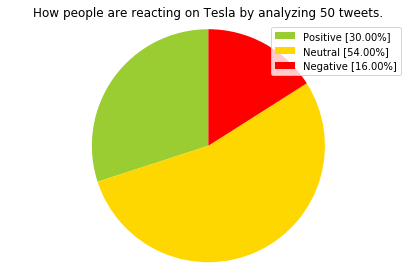

In [22]:
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfSearchTerms = int(input("Enter how many tweets to search: "))

tweets = tweepy.Cursor(api.search, q=searchTerm).items(NoOfSearchTerms)

positive = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    #print (tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    if (analysis.sentiment.polarity < 0):
        negative += 1
    if (analysis.sentiment.polarity > 0):
        positive += 1

positive = percentage(positive,NoOfSearchTerms)
neutral = percentage(neutral,NoOfSearchTerms)
negative = percentage(negative,NoOfSearchTerms)

positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')

labels = ['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches, texts = plt.pie(sizes, colors = colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfSearchTerms) + " tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
#Word Cloud 

In [1]:
import tweepy
import json
import pandas as pd
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt

import operator
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer

In [2]:
consumerKey = 'a1zyInaIw7y6vzCnxtyyJ8Bkk'
consumerSecret = 'p0M5h6sZewFcCAjIdJUlPldV9S13QKwtRkh04MpoSrugGslxlA'
accessToken = '142729769-53yVD8eLUEjiUJpBcTvRVUYMmHDiqEZ7cbNN7BFs'
accessTokenSecret = 'UhcMzCrYtfzdU70vibsUQ70Vpd4UZ65cT0SBGYYgsSBXh'

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
results = []
for tweet in tweepy.Cursor (api.search, q = 'manutd', lang = "en").items(500): 
    results.append(tweet)
    
print (type(results))
print (len(results))
#print (results[4000].text)

<class 'list'>
500


In [5]:
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set
data_set = tweets_df(results)

In [6]:
text = data_set["text"]

for i in range(0,len(text)):
    txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
    data_set.set_value(i, 'text2', txt)
    
data_set.drop_duplicates('text2', inplace=True)
data_set.reset_index(drop = True, inplace=True)
data_set.drop('text', axis = 1, inplace = True)
data_set.rename(columns={'text2': 'text'}, inplace=True)

/home/ishu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [7]:
Htag_df = pd.DataFrame()
j = 0

for tweet in range(0,len(results)):
    hashtag = results[tweet].entities.get('hashtags')
    for i in range(0,len(hashtag)):
        Htag = hashtag[i]['text'] 
        Htag_df.set_value(j, 'Hashtag',Htag)
        j = j+1

/home/ishu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [8]:
Htag_df

,Hashtag
0,MUFC
1,MUTOUR
2,mufc
3,MUTOUR
4,MUTOUR
5,MUFC
6,Quakes74
7,mufc
8,MUTOUR
9,MUFC


In [9]:
Hashtag_Combined = " ".join(Htag_df['Hashtag'].values.astype(str))

#no_millennials = " ".join([word for word in Hashtag_Combined.split()
#                                if word != 'millennials'
#                                and word != 'Millennials'
#                                and word != 'Boomers'
#                                and word != 'GenX'
#                                                                
#                                ])

In [10]:
Tweet_mask = imread("twitter_mask.png", flatten=True)

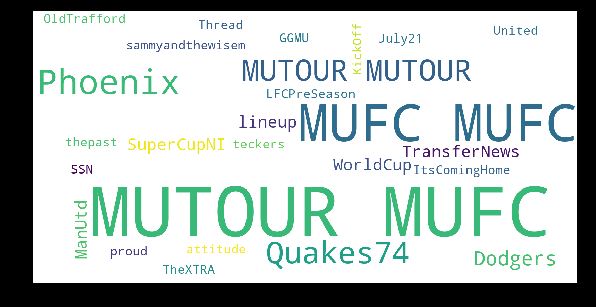

In [21]:
#Create a Word Cloud
wc = WordCloud(background_color="white", stopwords=STOPWORDS, width=1600, height=800)
wc.generate(Hashtag_Combined)
plt.figure( figsize=(10,5), facecolor='k')
plt.imshow(wc)
plt.axis("off")
#plt.tight_layout(pad=0)
plt.savefig('millennials_Hashtag.png', dpi=600)
plt.show()